# LIBRARIES

* Execute this cell to import the libraries we need.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ipywidgets as widgets

<br/><br/>
<!--  -->

# OPTICS

## PART 1 - Wave Superposition
An important principle of wave behavior is __superposition__ - When two waves combine, the resultant wave is simply their sum. Waves are not "more than the sum of their parts"—they _are_ the sum of their parts.

Because of this, any waveform can be decomposed into a sum of pure sine and cosine waves of specific frequencies. This can be done using the __Fourier Transform__, which transforms a signal from the time domain to the frequency domain.

> This descriptioin of the Fourier Transform is sufficient for our purposes.
> If you are curious about the details, check out this excellent video:
> [3Blue1Brown's Fourier Transform Explanation (YouTube)](https://www.youtube.com/watch?v=spUNpyF58BY&t=554s)

### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. Don't modify these.

In [ ]:
def superposition_plot(f1, p1, f2, p2):
    fig, (ax1, ax2) = plt.subplots(2,1)
    x, y_1, y_2, y_superposition = waves_and_superposition(f1,p1,f2,p2)

    ax1.plot(x,y_1,label='First Wave',alpha=0.6,color='red')
    ax1.plot(x,y_2,label='Second Wave',alpha=0.6,color='orange')
    ax1.plot(x, y_superposition,label='Sum of waves',color='blue')
    ax1.set_title('Wave Superposition')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Amplitude')
    ax1.set_ylim(-3, 3)
    ax1.set_xlim(0,4)

    fourier_x, fourier_y = fourier_transform(y_superposition)
    ax2.plot(fourier_x,fourier_y)
    ax2.set_title('Fourier Transform of Resulting Wave')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Contribution')
    ax2.set_xlim(0,6)
    ax2.set_ylim(0,1.05)

    plt.subplots_adjust(hspace=0.6)
    plt.show()

In [ ]:
def fourier_transform(signal):
    sampling_rate = 64  
    T = 1 / sampling_rate  
    
    n = len(signal)
    fft_signal = np.fft.fft(signal)
    fft_signal = fft_signal / n 
    
    frequencies = np.fft.fftfreq(n, T)
    
    positive_frequencies = frequencies[:n // 2]
    fft_signal_magnitude = np.abs(fft_signal[:n // 2])
    return positive_frequencies, fft_signal_magnitude

In [ ]:
def interactive_superposition_plot():
    widgets.interact(superposition_plot, f1=(0,5,0.1), p1=(0,20,0.1),f2=(0,5,0.1),p2=(0,20,0.1))

### CODE
* Complete the `waves_and_superposition()` function to create two waves and their superposition from the frequencies and phases of each wave.
* Call the `interactive_superposition_plot()` function to generate a plot with widgets.
* Explore the results of changing the phase and frequencies of the two waves.

In [ ]:
def waves_and_superposition(f1,p1,f2,p2):
    #creating list of x values for use with our functions
    x = np.linspace(0, 10, 640) 
    #transforming to angular frequencies for use in sine
    w1 = 2 * np.pi * f1
    w2 = 2 * np.pi * f2
    #write this part!
    y_1 = np.sin(w1 * x + p1)
    y_2 = np.sin(w2 * x + p2)
    y_superposition = y_1 + y_2
    return x, y_1, y_2, y_superposition

In [ ]:
interactive_superposition_plot()

interactive(children=(FloatSlider(value=2.0, description='f1', max=5.0), FloatSlider(value=10.0, description='…

### SHORT RESPONSE QUESTIONS
1. How do the frequencies of the component waves relate to the frequencies observed in the Fourier transform of their superposition?
2. Does changing the phase of each wave affect this relationship?
3. How is superposition related to constructive and destructive interference?
### ANSWER

1. We observe that the frequencies we set for each component wave are the same as the frequencies observed in the fourier transform of the wave made by adding them.
2. This relationship does not change as we change the phase of each wave (*with the exception of the case where both waves have the same frequency and the phase causes complete destructive interference*).
3. Constructive and destructive interference are the two cases of wave superposition, where the components of each wave have the same or different sign respectively.

<br/><br/>

## PART 2 - Intensity vs. Amplitude and the Double Slit Experiment
The double slit experiment provides strong evidence that light behaves as a wave. 

When light passes through two closely spaced slits and illuminates a screen, the resultant pattern is _not_ the sum of the patterns from each individual slit. If light waves combine linearly, why don't light intensities? The reason lies in the nonlinear relationship between intensity and amplitude:
$$
I \propto A^2
$$
In the double slit experiment, constructive interference occurs when:
$$
d \cdot{}sin(\theta) = n\lambda
$$
where d is the distance between slits, $\theta$ is the angle relative to the perpendicular, n is any integer, and $\lambda$ is the wavelength.

Conversely, destructive interference occurs when:
$$d \cdot{}sin(\theta) = (n + \frac{1}{2})\lambda$$
Try and prove this to yourself!


### GIVEN FUNCTIONS

* Execute the blocks containing the given functions. Don't modify these.

In [ ]:
def intensity_amplitude_plot(wavelength,amplitude):
    wavenumber = 1/ wavelength
    w = 2 * np.pi * wavenumber
    x = np.linspace(-1000, 1000, 500)
    y_wave = amplitude * np.sin(w * x)
    y_intensity = y_wave **2
    plt.plot(x,y_wave,label='Wave Amplitude')
    plt.plot(x,y_intensity,label='Wave Intensity')
    plt.axhline(0,color='grey')
    plt.legend()
    plt.ylabel('Intensity and Amplitude (not to scale)')
    plt.xlabel('Position (nm)')
    plt.title('Amplitude and Intensity')
    plt.xlim(-1000,1000)
    plt.ylim(-3,10)
    plt.show()

In [ ]:
def interactive_intensity_plot():
    widgets.interact(intensity_amplitude_plot, wavelength=(200,1000,10),amplitude=(0.5,3,0.5))

In [ ]:
def plot_wave_interference(phases,wavelength,ax):
    bounds = (-2.5*wavelength,2.5*wavelength)
    wavenumber = 1/wavelength
    w = 2 * np.pi * wavenumber 
    x = np.linspace(*bounds, 200)
    y_1 = 0.5 * np.sin(w * x)
    y_superposition = y_1
    ax.plot(x,y_1,alpha=0.3)
    for i, phase in enumerate(list(phases)):
        phase = 2 * np.pi * phase
        y_new =  0.5 * np.sin(w * x + phase)
        y_superposition += y_new
        plot_version = y_new.copy()
        ax.plot(x,plot_version,alpha=0.3)
    norm = (len(phases) / 2) if len(phases) > 1 else 1 
    y_superposition /= norm
    ax.plot(x, y_superposition)
    ax.set_ylim(-2, 2)
    return ax

In [ ]:
from matplotlib.gridspec import GridSpec
def interference_plot_template(theta=0,d=1000,wavelength = 400,iterations=2,crystal=False,extra_vars=[]):
    fig = plt.figure(figsize=(6,6))
    gs = GridSpec(2, 3, figure=fig, height_ratios=[1, 1])
    ax2 = fig.add_subplot(gs[1, :])
    ax1 = fig.add_subplot(gs[0, 1:])
    ax_text = fig.add_subplot(gs[0, 0])

    if d != 0:
        ax1.set_xlim([-d * 2, d* 2])
        ax1.set_ylim([0, d * 3]) 
    ax1.set_aspect('equal', adjustable='box')
    ax1.set_title(f'Path of parallel rays, $\\theta={np.degrees(theta):.1f}\\degree$')
    ax1.set_xlabel('x (nm)')
    ax1.set_ylabel('y (nm)')

    if crystal:
        L = 2 * d * np.sin(theta)
    else:
        L = d * np.sin(theta)
    phase = L / wavelength
    if iterations > 2:
        orders = np.array([i for i in range(1,iterations)])
        phases = orders * phase
        ax2 = plot_wave_interference(phases,wavelength,ax2)
    else:
        ax2 = plot_wave_interference([phase],wavelength,ax2)
        
    ax2.set_xlim(-wavelength * 2.5,wavelength * 2.5)
    ax2.set_ylim(-1.05,1.05)
    ax2.set_title(f'Interference of parallel rays')
    ax2.set_xlabel('Position (nm)')
    ax2.set_ylabel('Amplitude (not to scale)')

    ax_text.axis("off") 
    variable_text = [
        f'$\\lambda={wavelength}nm$',
        f'$\\theta={np.degrees(theta):.1f}\\degree$',
    ]
    if crystal:
        variable_text.append(f'$d={d:.3f}nm$')
    else:
        variable_text.append(f'$d={d:.0f}nm$')
    if extra_vars:
        variable_text.extend(extra_vars)
    if crystal:
        variable_text.append(f'$L=2d\\cdot{{}}sin(\\theta) = {L:.3f}nm$')
        variable_text.append(f'$2\\theta={2*np.degrees(theta):.1f}\\degree$')
    else:
        variable_text.append(f'$L=d\\cdot{{}}sin(\\theta) = {L:.0f}nm$')
    ax_text.text(0.25, 0.5, "\n\n".join(variable_text), fontsize=10, ha="center", va="center")
    plt.subplots_adjust(hspace=0.4)

    return fig, (ax1,ax2,ax_text)

In [ ]:
def interference_subplot(ax1,theta,d,iterations):
    signed_angle = theta
    theta = np.abs(theta)
    height = d * 3
    translations = range(-iterations//2,iterations//2)
    phase_lengths = []
    for i, translation in enumerate(translations):
        origin = np.array([float(translation) * d,0.00])
        p1 = origin + np.array([-d/2 , 0.0])
        p2 = origin + np.array([d/2, 0.0])
        p3_x = d * np.cos(theta) * np.cos(theta)
        p3_y = d * np.cos(theta) * np.sin(theta)
        p3 = p1 + np.array([p3_x,p3_y])
        p45_trans = np.array([-np.tan(theta) * height,height])
        p4 = p2 + p45_trans
        points = [p1,p2,p3,p4]
        x = np.array([point[0] for point in points])
        y = np.array([point[1] for point in points])
        phase_length = np.linalg.norm(p2-p3)
        phase_lengths.append(phase_length)

        if i == 0:
            pairs = [(p2,p4)]
        else:
            pairs = [(p1,p3),(p2,p3),(p3,p4)]
        for pair in pairs:
            x = np.array([point[0] for point in pair if type(point) is np.ndarray])
            y = np.array([point[1] for point in pair if type(point) is np.ndarray])

            if signed_angle > 0:
                ax1.plot(-x,y)
            else:
                ax1.plot(x,y)

In [ ]:
def plot_double_slit(theta):
    d = 1000
    wavelength = 400
    theta = np.radians(theta)
    fig, (ax1,ax2,ax_text) = interference_plot_template(theta,d,wavelength)
    ax1 = interference_subplot(ax1,theta,d,2)

    plt.show()

In [ ]:
def interactive_double_slit_plot():
    widgets.interact(plot_double_slit, theta=(-90,90,0.10))

### CODE
* Run the `interactive_intensity_plot()` function and explore the relationship between the intensity and amplitude of light.
* Run the `interactive_double_slit_plot()` function and explore how the light rays passing through the slit interfere as the angle changes.

In [ ]:
interactive_intensity_plot()

interactive(children=(IntSlider(value=600, description='wavelength', max=1000, min=200, step=10), FloatSlider(…

In [ ]:
interactive_double_slit_plot()

interactive(children=(FloatSlider(value=0.0, description='theta', max=90.0, min=-90.0), Output()), _dom_classe…

### SHORT RESPONSE QUESTIONS
1. At what angles and path length differences was the greatest constructive interference observed?
2.  How about for destructive interference?
3. How are these angles and distances related to the wavelength of light passing through the slits?
4. How is the relationship between light intensity and amplitude similar to the relationship between probability density and wavefunction amplitude for an electron?
### ANSWER

1. We observed constructive interference at the following angles: 0 deg, 23.7 deg, 52.7 deg
2. We observed destructive interference at the following angles: 11.6 deg, 37 deg, 90 deg
3. For the angles where constructive interference occurs, the extra path length is equal to an integer times the wavelength of the light. For the angles where destructive interference occurs, the extra path length is a half-integer multiple of wavelength.
4. It is actually the same relationship: $P(r) = \psi{}^2(r)$

<br/><br/>

## Part 3 - Diffraction
What if instead of two slits, we had hundreds or thousands? What kind of pattern would we see?

When light passes through a large number of closely spaced slits, the result is __diffraction__—a pattern of sharp, bright spots separated by complete darkness, unlike the gradual transtions between light and dark observed for the double slit experiment.

As with the double slit experiment, we constructive interference when:
$$n\lambda = d\cdot{}sin(\theta)$$

But why does this happen? The answer lies in how waves from many slits combine, which you'll explore in the next steps.

### GIVEN FUNCTIONS

* Execute the blocks containing the given functions. Don't modify these.

In [ ]:
def plot_diffraction(theta):
    d = 1000
    wavelength = 400
    theta = np.radians(theta)
    fig, (ax1,ax2,ax_text) = interference_plot_template(theta,d,wavelength,iterations=25)
    ax1 = interference_subplot(ax1,theta,d,25)

    plt.show()

In [ ]:
def interactive_diffraction_plot():
    widgets.interact(plot_diffraction, theta=(-70,70,0.1))

### CODE
* Run the `interactive_diffraction_plot()` function to explore the interference pattern from 25 light waves passing through nearby slits.

In [ ]:
interactive_diffraction_plot()

interactive(children=(FloatSlider(value=0.0, description='theta', max=70.0, min=-70.0), Output()), _dom_classe…

### SHORT RESPONSE QUESTIONS
1. Why does diffraction produce much sharper peaks compared to two-slit interference?
2. How would the wave superposition plot (the lower image) change if we simulated an infinite number of slits instead of 25?
3. How can we determine the slit spacing for a diffraction grating if it is unknown?
### ANSWER

1. Diffraction produces sharper peaks because there are so many waves that, unless they are all lined up, for any given wave passing through one of the slits there is likely another wave that cancels it out. For an infinite number of slits, there _is_ another wave that cancels it out.
2. For an infinite amount of slits, there would be complete destructive interference everywhere except at the points of complete constructive interference.
3. We could pass light of a known wavelength through, measure at which angles constructive interference occurs, and use the equation $n\lambda = d\cdot{}sin(\theta)$ to calculate this value.

<br/><br/>
<br/><br/>

# WAVES

## PART 1 - QUANTIZATION
As can be seen, standing waves are an interesting case as only specific wavenumbers / wavelengths satisfy the boundary conditions of the system.  
This mirrors a fundamental concept in quantum mechanics: the quantization of physical properties like energy and momentum.  
In this section, you will examine the allowed wavenumbers and frequencies for a standing wave and the relationships between them. 

### CODE
* Plot wavenumber and frequency versus harmonic number.   

In [10]:
harmonics   = [1,2,3]
wavenumbers = [k1,k2,k3]
frequencies = np.abs(np.array([w1,w2,w3]))

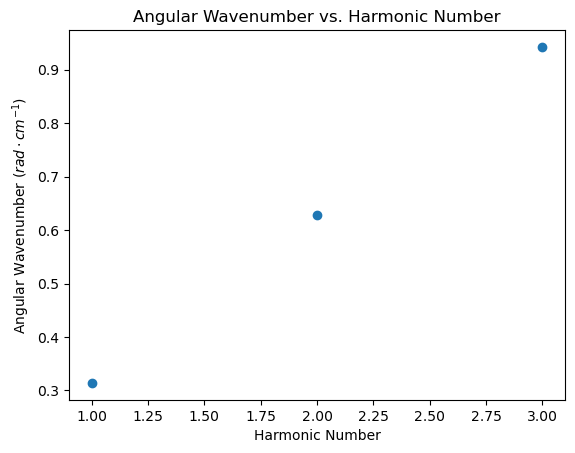

k = 0.31 * n + -0.00


In [11]:
plt.scatter(harmonics,wavenumbers) #students choose what to plot, the rest is given
plt.title('Angular Wavenumber vs. Harmonic Number')
plt.xlabel('Harmonic Number')
plt.ylabel('Angular Wavenumber ($rad \cdot{} cm^{-1}$)')
plt.show()
k_slope,k_int = np.polyfit(harmonics,wavenumbers,1)
print(f'k = {k_slope:.2f} * n + {k_int:.2f}')

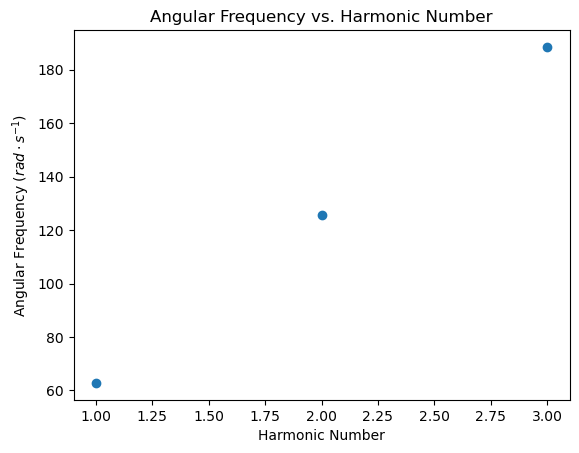

w = 62.83 * n + -0.00


In [13]:

plt.scatter(harmonics,frequencies) #students choose what to plot, rest is given
plt.title('Angular Frequency vs. Harmonic Number')
plt.xlabel('Harmonic Number')
plt.ylabel('Angular Frequency ($rad \cdot{} s^{-1}$)')
plt.show()
w_slope,w_int = np.polyfit(harmonics,frequencies,1)
print(f'w = {w_slope:.2f} * n + {w_int:.2f}')

### SHORT RESPONSE QUESTIONS
1. What expression did you obtain for wavenumber? For frequency? What do these expressions tell us?
2. In the context of chemistry, how does quantization explain atomic spectra? 
### ANSWERS

1. We obtain the following expressios: $k = 0.31 \cdot{} n$, $w = 62.83 \cdot{} n$ and these tell us that all allowed wavenumbers and frequencies for a classical standing wave are integer multiples of the lowest wavenumber and frequency respectively.
2. Because there are only certain allowed energy levels for atomic orbitals, there are necessarily only certain differences between them. This means that only photons with certain energy levels will be absorbed, resulting in line spectra.

<br/><br/>
<!--  -->

## PART 2 - STANDING WAVES ON A SPHERE
We have seen how quantization might necessarily arise from the nature of waves, but it may not be completely intutive how this relates to chemistry yet.  
This may become more clear if we consider what wave quantization looks like on a spherical surface.

### GIVEN FUNCTIONS
* Execute the blocks containing the given functions. Don't modify these.  
(Adapted from: https://github.com/DalInar/schrodingers-snake)  

In [31]:
from scipy.special import sph_harm
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.colors as mcolors

def plot_spherical_harmonic(l,m):
    '''
    adapted from code at https://github.com/DalInar/schrodingers-snake
    '''
    thetas = np.linspace(0, np.pi, 20)
    phis = np.linspace(0, 2*np.pi, 20)
    
    (Theta,Phi)=np.meshgrid(thetas,phis) 
    s_harm=sph_harm(m, l, Phi, Theta)
       
    R = abs(s_harm.real) #modified this to show only real part of spherical harmonic, to make connection to atomic orbitals more explicit
    X = R * np.sin(Theta) * np.cos(Phi)
    Y = R * np.sin(Theta) * np.sin(Phi)
    Z = R * np.cos(Theta)

    vmin = -1
    vmax = 1
    cmap = plt.get_cmap('jet')
    norm = mcolors.Normalize(vmin=Z.min(), vmax=Z.max())
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),facecolors=cmap(norm(R)),
        linewidth=0, antialiased=False, alpha=0.4)
    # ax.set_aspect('equal')
    plt.title(r'Real Part of Spherical Harmonics, $Y_l^m(\theta,\phi)$'+r', $l=$'+str(l)+r', $m=$'+str(m))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.ylabel(r'$z$')
    
    plt.show()

### CODE
* Using the provided function, explore different combinations of integer inputs.  

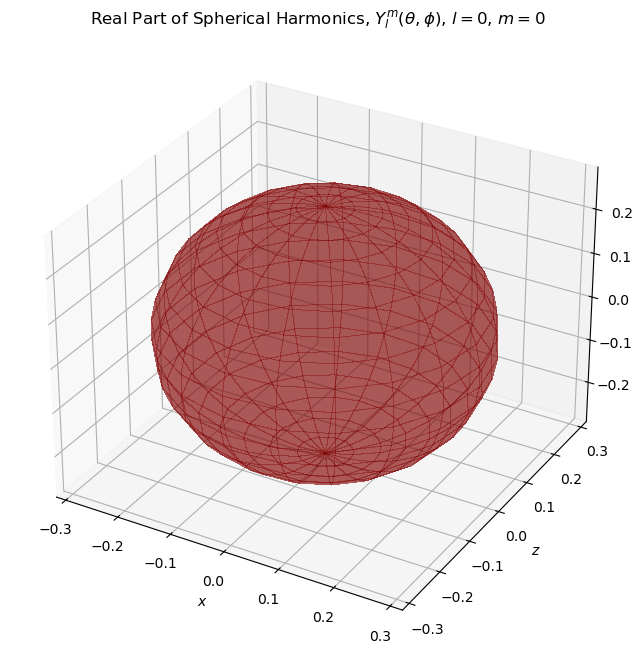

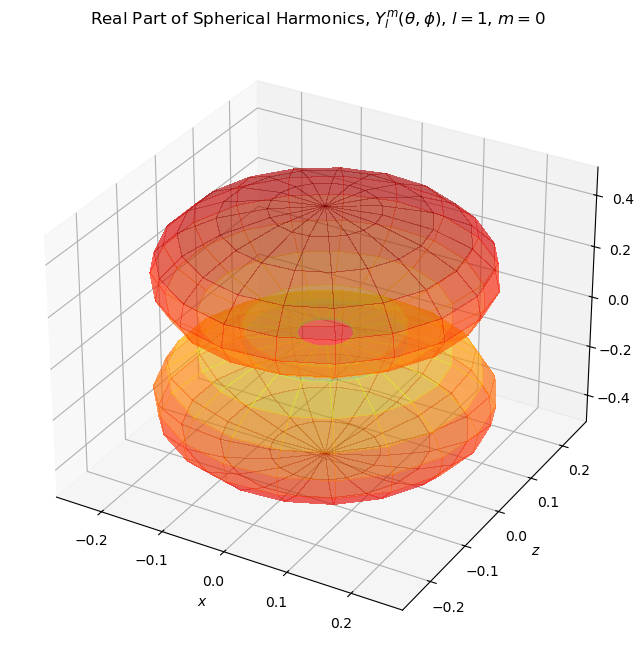

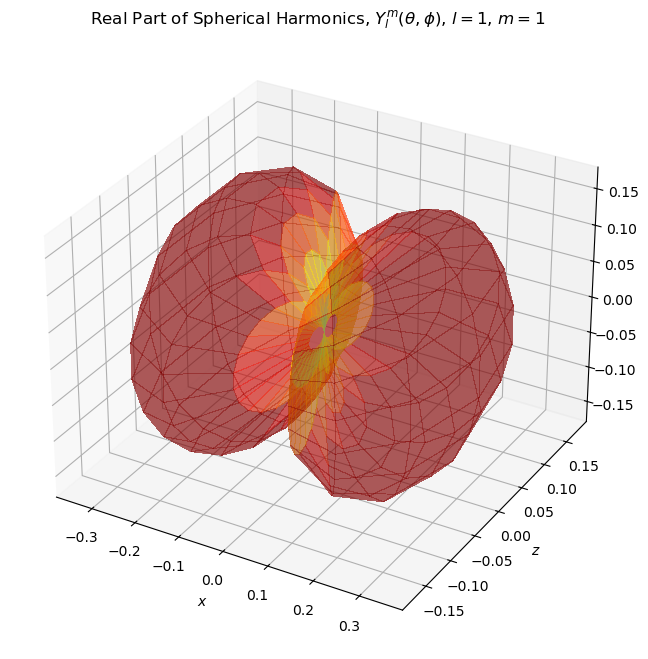

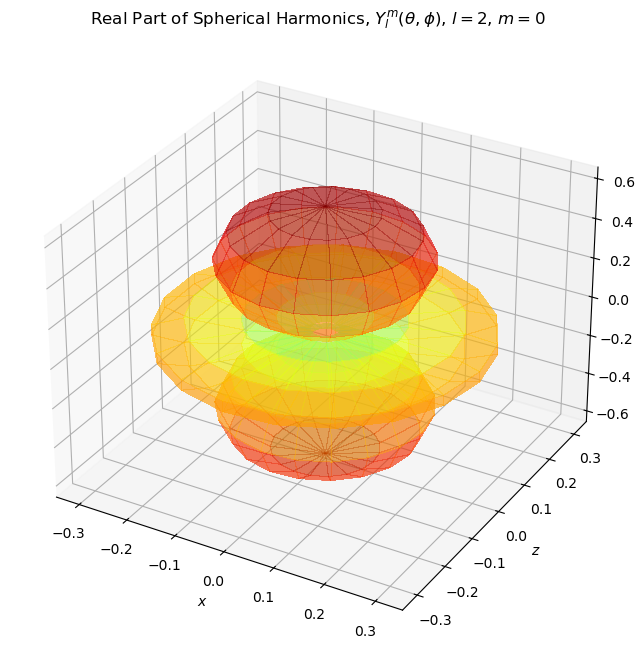

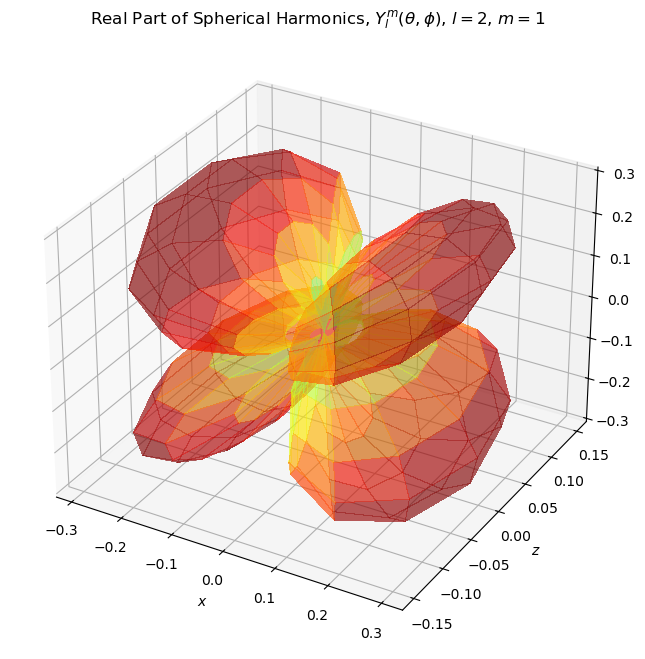

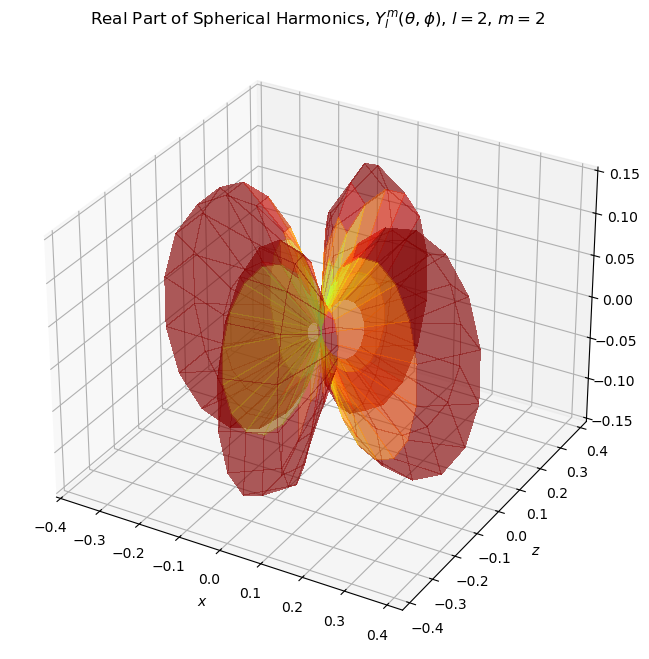

In [32]:
plot_spherical_harmonic(0,0)
plot_spherical_harmonic(1,0)
plot_spherical_harmonic(1,1)
plot_spherical_harmonic(2,0)
plot_spherical_harmonic(2,1)
plot_spherical_harmonic(2,2)

### SHORT RESPONSE QUESTIONS
1. Where do you recognize these shapes from?  
2. These are not quite what you recognize- These only have wave components depending on $\theta$ and $\phi$. What is the missing wave component?
### ANSWER

1. These are the characteristic shapes of the s, p, and d atomic orbitals!
2. The missing part is the radial component of the wave, whose amplitude depends on distance from the center and not on angle around the sphere.

<br/><br/>
<br/><br/>
<!--  -->

# REFLECTION

### SHORT RESPONSE QUESTIONS
1. Explain the importance of approximate math and iterative algorithms in the context of computational science.
2. Explain the concept of emergent behavior and provide an example besides those presented here.
3. Explain the connection between quantum mechanics and classical wave mechanics.
### ANSWERS

1. These kinds of algorithms are very necessary because some things are impossible to calculate exactly, like many body problems or quantum mechanics.
2. Emergent behavior happens when complex behavior arises from interactions between simple things. Another would be the gas laws, which can be understood as arising from statistics and Newton's laws acting on very large numbers of individual particles.
3. Quantum mechanics tells us that fundamental particles have both wave and particle nature. Just like classical standing waves only have certain allowed configurations, so too do quantum particles, because of their wave nature.